<a href="https://colab.research.google.com/github/josepeon/calculus_parsons/blob/main/neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

In [59]:
tips = sns.load_dataset('tips')

In [60]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [87]:
X = tips[['total_bill']]
y = tips[['tip']]

In [90]:
X = (X - X.mean())/X.std()

In [91]:
model = nn.Linear(in_features = 1, out_features = 1)

In [92]:
list(model.parameters())

[Parameter containing:
 tensor([[0.5679]], requires_grad=True),
 Parameter containing:
 tensor([0.0815], requires_grad=True)]

In [93]:
#Turn into Pytorch tensors
xt = torch.tensor(X.values, dtype = torch.float32)
yt = torch.tensor(y.values, dtype = torch.float32)

In [94]:
model(xt)

tensor([[-0.0969],
        [-0.5211],
        [ 0.1596],
        [ 0.3299],
        [ 0.3880],
        [ 0.4327],
        [-0.6213],
        [ 0.5341],
        [-0.2213],
        [-0.2378],
        [-0.5256],
        [ 1.0687],
        [-0.1970],
        [-0.0050],
        [-0.2347],
        [ 0.1960],
        [-0.5217],
        [-0.1415],
        [-0.0981],
        [ 0.1366],
        [-0.0375],
        [ 0.1137],
        [-0.1747],
        [ 1.3341],
        [ 0.0837],
        [-0.0445],
        [-0.3278],
        [-0.3712],
        [ 0.2036],
        [ 0.0728],
        [-0.5715],
        [-0.0101],
        [-0.2200],
        [ 0.1392],
        [-0.0465],
        [ 0.3542],
        [-0.1402],
        [-0.1007],
        [ 0.0116],
        [ 0.8141],
        [-0.1575],
        [-0.0669],
        [-0.2914],
        [-0.5632],
        [ 0.7586],
        [-0.0139],
        [ 0.2374],
        [ 0.8862],
        [ 0.6406],
        [-0.0299],
        [-0.3807],
        [-0.5243],
        [ 1.

In [95]:
mse = nn.MSELoss()

In [96]:
yhat = model(xt)

In [97]:
mse(yt, yhat)

tensor(9.6777, grad_fn=<MseLossBackward0>)

In [98]:
loss = mse(yt, yhat)

In [99]:
loss.backward()

In [100]:
import torch.optim as optim

In [126]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [127]:
yhat = model(xt) #make predictions
loss = (mse(yt, yhat)) #evaluate errors
loss.backward() #computes derivatives
optimizer.step() #steps down loss function one iteration

In [128]:
list(model.parameters())

[Parameter containing:
 tensor([[0.8966]], requires_grad=True),
 Parameter containing:
 tensor([2.6962], requires_grad=True)]

In [129]:
new_yhat = model(xt)

In [130]:
mse(yt, new_yhat)

tensor(1.1287, grad_fn=<MseLossBackward0>)

In [131]:
losses = []
for epoch in range(1000):
  #pass data through the model
  yhat = model(xt)
  #evaluate the predictions
  loss = mse(yt, yhat)
  #calculate derivatives
  optimizer.zero_grad() #pytorch thing to clear memory of derivatives
  loss.backward()
  losses.append(loss.item())
  #update parameters using gradient descent
  optimizer.step()

In [132]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9350]], requires_grad=True),
 Parameter containing:
 tensor([2.9983], requires_grad=True)]

In [133]:
losses

[1.128749132156372,
 1.125077247619629,
 1.1215507984161377,
 1.1181639432907104,
 1.1149111986160278,
 1.1117873191833496,
 1.1087870597839355,
 1.1059056520462036,
 1.1031383275985718,
 1.100480556488037,
 1.0979280471801758,
 1.095476508140564,
 1.0931222438812256,
 1.0908610820770264,
 1.0886895656585693,
 1.0866039991378784,
 1.084600806236267,
 1.0826772451400757,
 1.0808297395706177,
 1.0790553092956543,
 1.0773510932922363,
 1.0757144689559937,
 1.0741426944732666,
 1.0726332664489746,
 1.0711833238601685,
 1.0697910785675049,
 1.0684536695480347,
 1.067169427871704,
 1.0659359693527222,
 1.0647512674331665,
 1.0636135339736938,
 1.0625208616256714,
 1.0614715814590454,
 1.0604636669158936,
 1.0594956874847412,
 1.0585662126541138,
 1.0576733350753784,
 1.0568158626556396,
 1.0559923648834229,
 1.055201530456543,
 1.0544418096542358,
 1.0537124872207642,
 1.0530117750167847,
 1.0523388385772705,
 1.0516927242279053,
 1.051072120666504,
 1.05047607421875,
 1.0499037504196167,
 1

In [134]:
import matplotlib.pyplot as plt

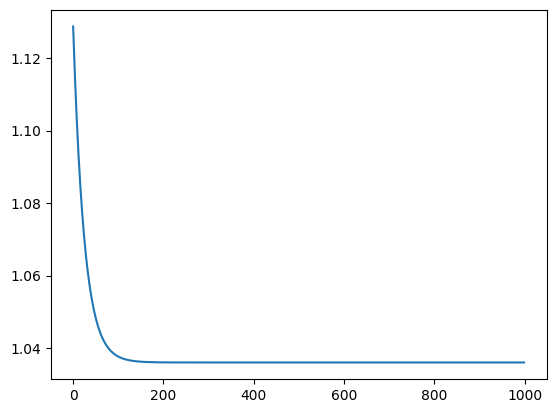

In [135]:
plt.plot(losses)